In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face Mask Dataset**

In [2]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 95% 155M/163M [00:01<00:00, 168MB/s]
100% 163M/163M [00:01<00:00, 152MB/s]


In [3]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the required libraries**

In [5]:
import os #to access the files that we have in folders
import numpy as np #to covert images into numpy arrays
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # to visulaize the images
import cv2 #used for image processing
from google.colab.patches import cv2_imshow #to display the image in another window
from PIL import Image #To read and perform some processing on images
from sklearn.model_selection import train_test_split #to split the data into training and test

In [6]:
#creates a list which contains all the file names of with_mask folder
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2216.jpg', 'with_mask_1758.jpg', 'with_mask_1235.jpg', 'with_mask_2291.jpg', 'with_mask_337.jpg']
['with_mask_1272.jpg', 'with_mask_1791.jpg', 'with_mask_2332.jpg', 'with_mask_386.jpg', 'with_mask_2235.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_72.jpg', 'without_mask_483.jpg', 'without_mask_1428.jpg', 'without_mask_3064.jpg', 'without_mask_1468.jpg']
['without_mask_2134.jpg', 'without_mask_317.jpg', 'without_mask_3101.jpg', 'without_mask_3520.jpg', 'without_mask_1579.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating labels for the two class of images**

with mask -->1

without mask -->0

In [9]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying images**

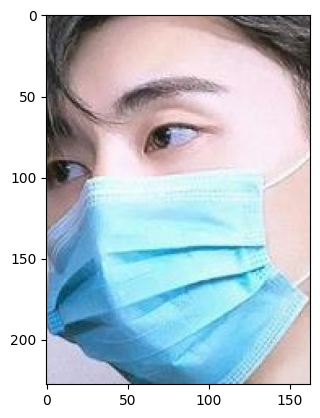

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

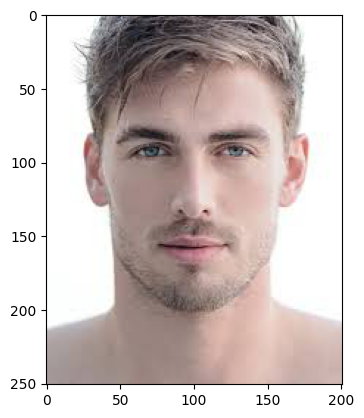

In [14]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3425.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image processing**

1.Resize the images

2.Convert the images to numpy arrays

In [15]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

In [18]:
data[0]

array([[[184, 198, 201],
        [185, 197, 201],
        [185, 196, 200],
        ...,
        [118, 117, 123],
        [121, 121, 125],
        [120, 120, 122]],

       [[185, 199, 202],
        [185, 197, 201],
        [185, 196, 200],
        ...,
        [120, 119, 125],
        [122, 121, 125],
        [121, 121, 123]],

       [[185, 199, 202],
        [186, 198, 202],
        [186, 197, 201],
        ...,
        [121, 120, 127],
        [122, 121, 125],
        [121, 121, 123]],

       ...,

       [[215, 199, 170],
        [216, 199, 171],
        [217, 200, 173],
        ...,
        [ 31,  31,  36],
        [ 40,  38,  40],
        [ 40,  37,  34]],

       [[215, 196, 170],
        [215, 197, 170],
        [217, 199, 173],
        ...,
        [ 50,  45,  47],
        [ 54,  48,  46],
        [ 56,  49,  43]],

       [[215, 193, 169],
        [216, 194, 170],
        [218, 196, 172],
        ...,
        [ 74,  61,  56],
        [ 69,  54,  47],
        [ 67,  51,  44]]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [31]:
X_train[0]

array([[[134, 131, 127],
        [137, 134, 131],
        [141, 137, 134],
        ...,
        [122, 121, 122],
        [119, 118, 118],
        [116, 116, 115]],

       [[135, 133, 129],
        [138, 135, 133],
        [142, 138, 136],
        ...,
        [125, 124, 124],
        [121, 121, 121],
        [118, 118, 118]],

       [[136, 134, 130],
        [140, 136, 134],
        [143, 140, 137],
        ...,
        [127, 127, 127],
        [124, 124, 124],
        [121, 120, 120]],

       ...,

       [[ 61,  60,  56],
        [ 53,  47,  40],
        [ 41,  25,  15],
        ...,
        [  7,   7,   7],
        [  7,   8,   8],
        [  5,   5,   5]],

       [[ 94,  92,  85],
        [ 59,  51,  40],
        [ 36,  21,  12],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  9,   9,   9]],

       [[ 81,  79,  71],
        [ 40,  31,  21],
        [ 30,  19,  10],
        ...,
        [  5,   5,   5],
        [  5,   6,   5],
        [ 11,  11,  11]]

In [32]:
X_train_scaled[0]

array([[[0.5254902 , 0.51372549, 0.49803922],
        [0.5372549 , 0.5254902 , 0.51372549],
        [0.55294118, 0.5372549 , 0.5254902 ],
        ...,
        [0.47843137, 0.4745098 , 0.47843137],
        [0.46666667, 0.4627451 , 0.4627451 ],
        [0.45490196, 0.45490196, 0.45098039]],

       [[0.52941176, 0.52156863, 0.50588235],
        [0.54117647, 0.52941176, 0.52156863],
        [0.55686275, 0.54117647, 0.53333333],
        ...,
        [0.49019608, 0.48627451, 0.48627451],
        [0.4745098 , 0.4745098 , 0.4745098 ],
        [0.4627451 , 0.4627451 , 0.4627451 ]],

       [[0.53333333, 0.5254902 , 0.50980392],
        [0.54901961, 0.53333333, 0.5254902 ],
        [0.56078431, 0.54901961, 0.5372549 ],
        ...,
        [0.49803922, 0.49803922, 0.49803922],
        [0.48627451, 0.48627451, 0.48627451],
        [0.4745098 , 0.47058824, 0.47058824]],

       ...,

       [[0.23921569, 0.23529412, 0.21960784],
        [0.20784314, 0.18431373, 0.15686275],
        [0.16078431, 0

**Building a Convolutional Neural Networks(CNN)**

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [35]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 22ms/step - loss: 0.4324 - acc: 0.8126 - val_loss: 0.2726 - val_acc: 0.8793
Epoch 2/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2908 - acc: 0.8830 - val_loss: 0.2488 - val_acc: 0.8893
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2483 - acc: 0.9016 - val_loss: 0.1908 - val_acc: 0.9025
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2123 - acc: 0.9174 - val_loss: 0.2250 - val_acc: 0.9091
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1867 - acc: 0.9296 - val_loss: 0.2255 - val_acc: 0.9256


**Model Evaluation**

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.1930 - acc: 0.9292
Test Accuracy = 0.9291859865188599


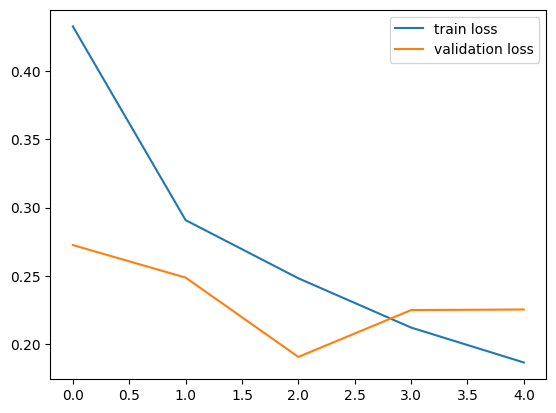

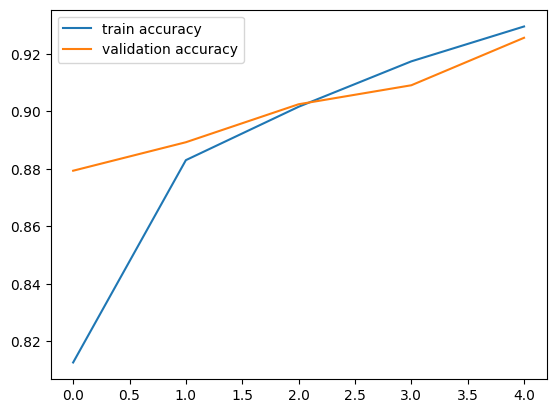

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test.jpg


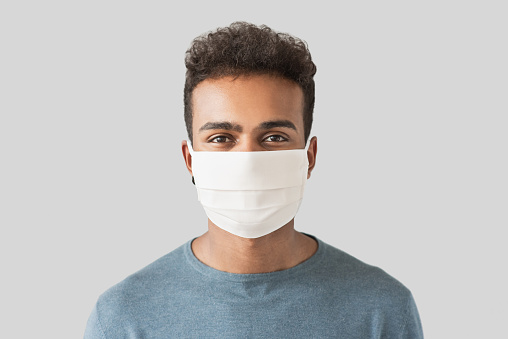

1/1 [==============================] - 0s 19ms/step
[[0.49206448 0.5432504 ]]
1
The person in the image is wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test.png


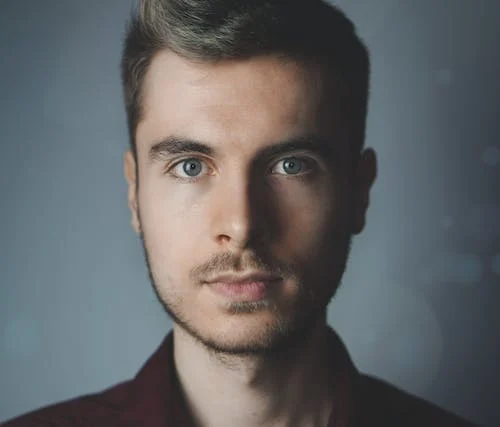

1/1 [==============================] - 0s 20ms/step
[[0.3490971 0.6730166]]
1
The person in the image is wearing a mask


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')